In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!conda install --yes beautifulsoup4

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be UPDATED:

  conda                                        4.8.1-py37_0 --> 4.8.2-py37_0



conda-4.8.2          | 2.8 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [6]:
source = requests.get(f'https://data.richmond.com/salaries/2018/state/university-of-virginia/tony-bennett')


In [4]:
soup = BeautifulSoup(source.text, 'html.parser')

main_box = soup.find("div", class_='pay')
print(main_box)
    
    


<div class="col-12 col-lg-4 pay">
<img alt="Tony Bennett" src="https://bloximages.newyork1.vip.townnews.com/richmond.com/content/tncms/assets/v3/editorial/6/49/6490d750-2b27-11e9-8b63-bbd7a8c52ab0/5c5cb0d3de5d7.image.jpg" style="width: 100%;"/>
<div class="well">
<p class="text-muted">2018-19 total compensation</p>
<h2 class="pay" id="paytotal">$525,000</h2>
<p class="text-muted">Pay components:</p>
<script id="pay_temp1" type="text/html">
					<% var pay = [ {'name': 'Base salary', 'amount': 525000 } ]; %>
						<% _.each( _.sortBy(pay, 'name'), function( paytype ){ %>
                    <p class="small" style="text-align:left; margin-bottom:0; margin:15px 0 5px 0;"><%= paytype.name %>: $<%= addCommas(paytype.amount) %></p>
                        <div style="margin:0; background:#eee; height:20px;">
						<div style="margin:0; float:left; background:#337ab7; height:100%; width:<%= getPct(paytype.amount, 525000) %>%;"></div>
                        </div>
                    <% }); %

In [7]:
salary = main_box.find('h2').text

print(salary)


$525,000


In [8]:
#or you could use the .find_all() function
#this returns a list of items

soup = BeautifulSoup(source.text, 'html.parser')  #html.parser allows handling of HTML files

main_box = soup.find_all("div", class_='col-12 col-lg-8')
print(len(main_box))

for i in main_box:
    print(i)
    print()

2
<div class="col-12 col-lg-8">
<div><!--Wrapper-->
<div><!--First Item of first row-->
<h1><b>
<span id="personhed">Tony Bennett</span>
<br/>
<span class="small text-muted" id="personjob">Basketball coach</span>
</b></h1>
</div><!--End of first item of first row-->
<!-- row2 -->
<div class="row"><!-- style="border-style: dashed; border-color:bisque;"-->
<!--First div in second row-->
<div class="col-12 col-lg-4 pay">
<img alt="Tony Bennett" src="https://bloximages.newyork1.vip.townnews.com/richmond.com/content/tncms/assets/v3/editorial/6/49/6490d750-2b27-11e9-8b63-bbd7a8c52ab0/5c5cb0d3de5d7.image.jpg" style="width: 100%;"/>
<div class="well">
<p class="text-muted">2018-19 total compensation</p>
<h2 class="pay" id="paytotal">$525,000</h2>
<p class="text-muted">Pay components:</p>
<script id="pay_temp1" type="text/html">
					<% var pay = [ {'name': 'Base salary', 'amount': 525000 } ]; %>
						<% _.each( _.sortBy(pay, 'name'), function( paytype ){ %>
                    <p class="small

In [22]:
#let's do a little more interesting example
names = ['Tony Bennett', 'James E Ryan', 'Bronco Mendenhall', 'Carla Williams', 'Scott C Beardsley', 'Craig Benson', 
        'Ian Baucom']

formatted_names_of_important_people = []

#start with a little string formatting. I am formatting each name so I can insert it into the URL
for important_person in names:
    important_person = important_person.replace(' ', '-')
    important_person = important_person.lower()
    formatted_names_of_important_people.append(important_person)

print(formatted_names_of_important_people)

['tony-bennett', 'james-e-ryan', 'bronco-mendenhall', 'carla-williams', 'scott-c-beardsley', 'craig-benson', 'ian-baucom']


In [23]:
#now I will use f-strings formatting to insert each name into the source URL
for name in formatted_names_of_important_people:
    
    source = requests.get(f'https://data.richmond.com/salaries/2018/state/university-of-virginia/{name}')
    soup = BeautifulSoup(source.text, 'html.parser')

    main_box = soup.find("div", class_='pay')
    salary = main_box.find('h2').text
    
    print(name, salary)



tony-bennett $525,000
james-e-ryan $962,875
bronco-mendenhall $500,000
carla-williams $566,500
scott-c-beardsley $582,099
craig-benson $421,300
ian-baucom $564,999


In [24]:
#but let's make this look a little nicer

for name in formatted_names_of_important_people:
    
    source = requests.get(f'https://data.richmond.com/salaries/2018/state/university-of-virginia/{name}') 
    soup = BeautifulSoup(source.text, 'html.parser')
    
    main_box = soup.find("div", class_='pay')
    salary = main_box.find('h2').text

    main_box = soup.find("div", class_='col-12 col-lg-8')
    span_class = main_box.find_all("span")
    job_title = span_class[1].text
        
    print(f'Name = {name}')
    print(f'Job Title = {job_title}')
    print(f'Salary = {salary}')     
    print()
    
    

Name = tony-bennett
Job Title = Basketball coach
Salary = $525,000

Name = james-e-ryan
Job Title = President University of Virginia
Salary = $962,875

Name = bronco-mendenhall
Job Title = Head Coach, Football-FBHC167
Salary = $500,000

Name = carla-williams
Job Title = Athletic Director
Salary = $566,500

Name = scott-c-beardsley
Job Title = Dean of the Darden School of Business
Salary = $582,099

Name = craig-benson
Job Title = Administrative - Professor
Salary = $421,300

Name = ian-baucom
Job Title = Dean of the College and Graduate School of Arts & Sciences
Salary = $564,999



In [27]:
#A common thing you might do is take this data and use it for your own purposes elsewhere.
#Let's take this data we have scraped and put it into a pandas DataFrame

data = []

for name in formatted_names_of_important_people:
    
    source = requests.get(f'https://data.richmond.com/salaries/2018/state/university-of-virginia/{name}')
    soup = BeautifulSoup(source.text, 'html.parser')

    main_box = soup.find("div", class_='pay')
    salary = main_box.find('h2').text
    
    data.append((name, salary))
    
print(data)

[('tony-bennett', '$525,000'), ('james-e-ryan', '$962,875'), ('bronco-mendenhall', '$500,000'), ('carla-williams', '$566,500'), ('scott-c-beardsley', '$582,099'), ('craig-benson', '$421,300'), ('ian-baucom', '$564,999')]


In [48]:
#Let's put this into a pandas Dataframe!

df = pd.DataFrame(data)
print(df)

                   0         1
0       tony-bennett  $525,000
1       james-e-ryan  $962,875
2  bronco-mendenhall  $500,000
3     carla-williams  $566,500
4  scott-c-beardsley  $582,099
5       craig-benson  $421,300
6         ian-baucom  $564,999


In [51]:
#now let's rename the columns in the pandas dataframe to something more descriptive

df.columns = ['Name', 'Salary']
print(df)


                Name    Salary
0       tony-bennett  $525,000
1       james-e-ryan  $962,875
2  bronco-mendenhall  $500,000
3     carla-williams  $566,500
4  scott-c-beardsley  $582,099
5       craig-benson  $421,300
6         ian-baucom  $564,999


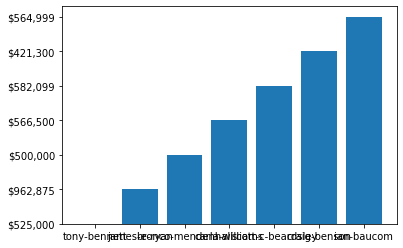

In [60]:
#lastly we could do something like plot this. This is a very simplistic plot
####Work on this!
pd.to_numeric(df['Salary'], errors='coerce')

plt.bar(df['Name'], df['Salary'])
plt.show()